## Zadanie 1 - Analiza obrazów

In [3]:
# przydatne funkcje numpy.fft.fft2, numpy.rot90, numpy.multiply, numpy.amax, numpy.fft.fft2

import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.image as img
import numpy.fft as fft

from PIL import Image, ImageFilter, ImageOps

### Wspólne funkcje

In [71]:
def dft_image(image):
    fft = np.zeros((len(image),len(image[0]), 3), dtype=complex)
    
    fft[:,:,0] = np.fft.fft2(image[:,:,0])
    fft[:,:,1] = np.fft.fft2(image[:,:,1])
    fft[:,:,2] = np.fft.fft2(image[:,:,2])

    return fft


def convert_to_grayscale(image_as_array):
    gray = np.dot(image_as_array[..., :3], [0.2989, 0.5870, 0.1140])
    
    return gray*255/np.amax(gray)


def correlation_between(image, pattern):
    fft1 = np.fft.fft2(image, axes=(0,1))
    fft2 = np.fft.fft2(np.rot90(pattern, k=2), axes=(0,1), s=(len(image),len(image[0])))
    C = np.fft.ifft2(np.multiply(fft1, fft2), axes=(0,1))
    
    return np.real(C)


def find_maxima(image):
    return image > (0.95*np.amax(image)) # for galia -> 0.95


def draw_square_around(image, point, height, width):
    left = point[0] - width
    right = point[0]
    top = point[1] - height
    bottom = point[1]
    
    if bottom>=0 and top<image.shape[1] and left>=0 and right<image.shape[0]:
        for i in range(left, right+1):
            image[i][top] = [255, 0, 0]
            image[i][bottom] = [255, 0, 0]

        for i in range(top, bottom+1):
            image[left][i] = [255, 0, 0]
            image[right][i] = [255, 0, 0]


# image in RGB coding
def mark_pattern(image, pattern_shape, correlation):
    
    for i in range(1, image.shape[0]-1):
        for j in range(1, image.shape[1]-1):
            if correlation[i][j]:
                draw_square_around(image, (i, j), pattern_shape[0], pattern_shape[1]) 
                
    return image


### Wyszukiwanie wzorca w obrazie tekstu (Galia.png)

In [73]:
galia = Image.open('galia.png').convert('RGB')
galia_e = Image.open('galia_e.png').convert('RGB')

inv_galia = ImageOps.invert(galia)
inv_galia_e = ImageOps.invert(galia_e)

corr = correlation_between(np.array(inv_galia.convert('L')), np.array(inv_galia_e.convert('L')))

# plt.imshow(correlation.filter(ImageFilter.SMOOTH))

image_maximas = find_maxima(corr)
corr[~image_maximas] = 0

galia_with_marks = mark_pattern(np.array(galia), np.array(inv_galia_e).shape, image_maximas)

Image.fromarray(galia_with_marks).show()

print('Liczba dopasowań wzorca: ', len(corr[image_maximas]))

Liczba dopasowań wzorca:  43


### Wyszukiwanie wzorca w obrazie (School.jpg)

[255 255 255]
(463, 953, 3)
FFT:  (463, 953)
(463, 953, 3)


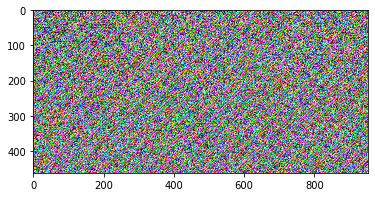

In [36]:
school = Image.open('school.jpg').convert('RGB')
fish = Image.open('fish.png').convert('RGB')

inv_school = ImageOps.invert(school)
inv_fish = ImageOps.invert(fish)

galia = Image.open('galia.png').convert('RGB')

inv_galia = ImageOps.invert(galia)

plt.imshow(inv_galia)
inv_galia.show()

values = np.array(inv_galia)

print(values[250][400])
print(values.shape)

fft = dft_image(values)
print(fft.shape)

fft_abs_image = Image.fromarray(np.absolute(fft), 'RGB')
fft_phase_image = Image.fromarray(np.angle(fft), 'RGB')

fft_abs_image.show()
fft_phase_image.show()

plt.imshow(fft_abs_image)
#plt.imshow(fft_phase_image)


## Zadanie 2 - OCR

In [ ]:
image_file = 'file_name'
pattern_file = 'file_name'